<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/salesPredictionProy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno : Valentin Gracia

se importa el dataset, y se despliega informacion basica

In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sales_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/salesPrediction/sales_predictions.csv")
print(f"HEAD \n {sales_df.head(3)}")
print(f"INFO \n {sales_df.info()}")
#print(sales_df.describe())
#sales_df.dropna(inplace=True)
#print(sales_df.info())



HEAD 
   Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700

[3 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Ou

buscamos las entradas unicas de columna y correjimos entradas no normalizadas

In [10]:
sales_df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
NCZ54            14.650       Low Fat           0.083699         Household     163.4552  OUT018             2009                       Medium       Tier 3                Supermarket Type2  2599.2832            1
FDJ04            18.000       Low Fat           0.124452         Frozen Foods  118.5124  OUT046             1997                       Small        Tier 1                Supermarket Type1  1303.6364            1
FDJ15            11.350       Regular           0.023322         Dairy         182.5608  OUT046             1997                       Small        Tier 1                Supermarket Type1  3307.6944            1
                                                0.023359         Dairy         184.4608  OUT049             1999                       Medium       Tier 1   

In [11]:
sales_df["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular","low fat":"Low Fat"}, inplace=True)
sales_df["Item_Fat_Content"].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

algunas vistas

In [12]:


sales_df.groupby(["Item_Fat_Content","Item_Type"])["Item_Outlet_Sales"].count()
(pd.pivot_table(sales_df, index=["Item_Type"], columns=["Item_Fat_Content"], values=["Item_Outlet_Sales"], aggfunc=np.sum,margins = True)).style.format('{0:,.0f}')

In [13]:
(pd.pivot_table(sales_df, index=["Outlet_Location_Type"], columns=["Item_Fat_Content"], values=["Item_Outlet_Sales"], aggfunc=np.sum,margins = True)).style.format('{0:,.0f}')

In [14]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [15]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib as mpl


profile = ProfileReport(sales_df,title="hola",html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

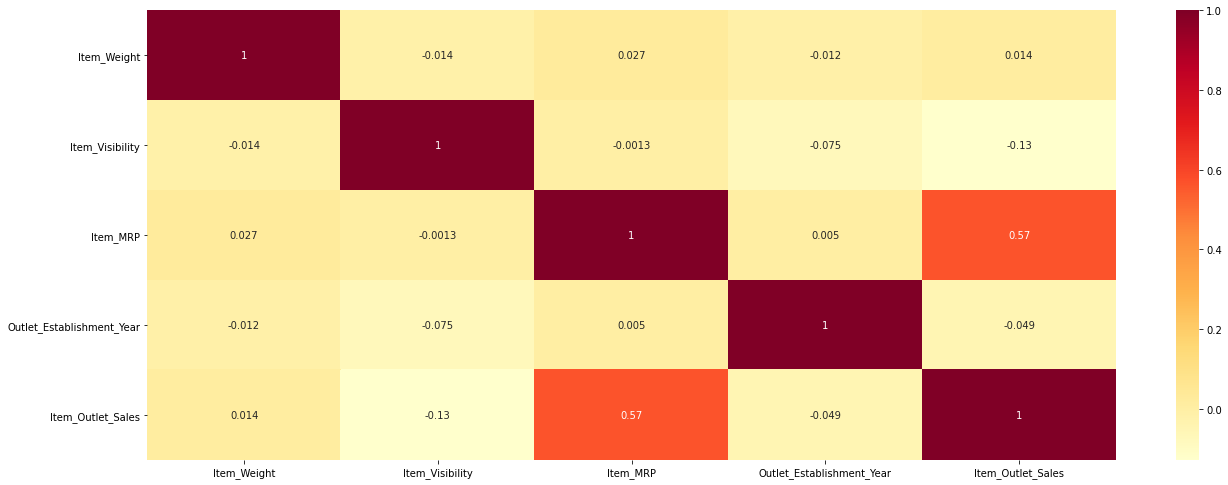

In [16]:
a4_dims = (21.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(sales_df.corr(), cmap="YlOrRd", annot=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c160f7d90>]],
      dtype=object)

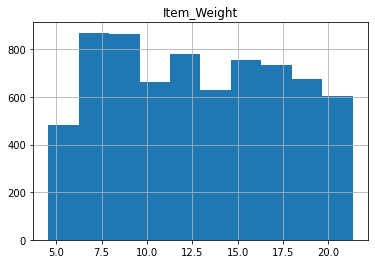

In [17]:
sales_df.hist(column="Item_Weight")

<BarContainer object of 1559 artists>

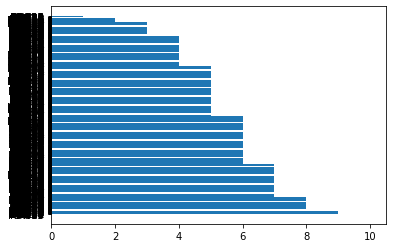

In [18]:
#display(sales_df["Item_Identifier"].value_counts())
y=sales_df["Item_Identifier"].value_counts().index
x=sales_df["Item_Identifier"].value_counts().values
plt.barh(y,x)

Item_Identifier


FDW13    10
FDG33    10
FDO19     9
FDX04     9
NCL31     9
         ..
FDC23     1
FDN52     1
FDK57     1
FDO33     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier


OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Outlet_Size


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

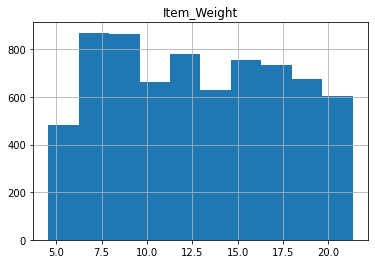

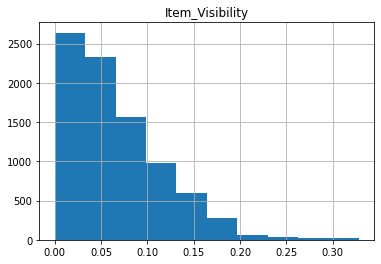

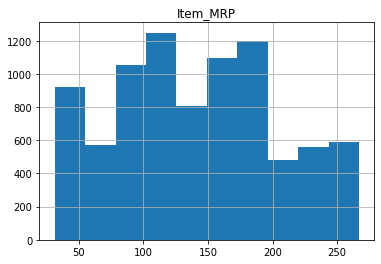

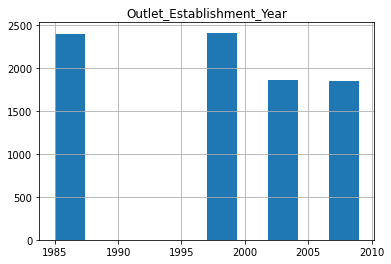

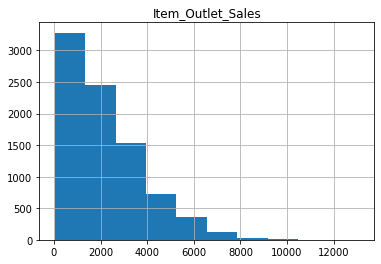

In [23]:

#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('CLP')
for c in sales_df.columns:
  if sales_df[c].dtype in ["float64","int64"]:
    sales_df.hist(column=c)
  else:
    print(c)
    display(sales_df[c].value_counts())
   
    #ax.boxplot(catsvdogs_df["Mean Number of Cats"], labels=['CATS']);
  

dtype('float64')